# TFlearn classification example using MNIST dataset
<a href="http://tflearn.org/" target="_blank" rel="noopener">TFlearn</a> is a python deep learning library which is running on top of the <a href="https://www.tensorflow.org/install/" target="_blank" rel="noopener">Tensorflow</a>. This library provides really easy to way implement deep neural networks and visualization with <a href="https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard" target="_blank" rel="noopener">Tensorboard</a>.

In [1]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist
import matplotlib.pyplot as plt
import numpy as np

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


/Users/isurujayarathne/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Import MNIST data from tflearn database

In [2]:
x, y, xtest, ytest = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


## Reshape training data and testing data

In [3]:
x = x.reshape([-1,28,28,1])
xtest = xtest.reshape([-1, 28, 28, 1])

## Show reshaped data as an image

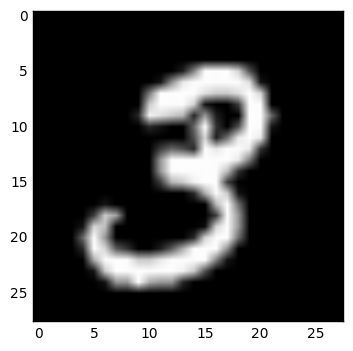

In [4]:
plt.imshow(x[1,:].reshape(28,28))
plt.gray()
plt.show()

## Define input layer
```python
tflearn.layers.core.input_data (shape=None, placeholder=None, dtype=tf.float32, data_preprocessing=None, data_augmentation=None, name='InputData')
```
More details: http://tflearn.org/layers/core/#input-data

In [5]:
cnet = input_data(shape=[None, 28, 28, 1], name='input')

## Define convolution layers with max pooling
```python
tflearn.layers.conv.conv_2d (incoming, nb_filter, filter_size, strides=1, padding='same', activation='linear', bias=True, weights_init='uniform_scaling', bias_init='zeros', regularizer=None, weight_decay=0.001, trainable=True, restore=True, reuse=False, scope=None, name='Conv2D')
```

More details: http://tflearn.org/layers/conv/#convolution-2d

```python
tflearn.layers.conv.max_pool_2d (incoming, kernel_size, strides=None, padding='same', name='MaxPool2D')
```
More details: http://tflearn.org/layers/conv/#max-pooling-2d

In [6]:
cnet = conv_2d(cnet, 32, 2, activation='relu')
cnet = max_pool_2d(cnet, 2)

cnet = conv_2d(cnet, 64, 2, activation='relu')
cnet = max_pool_2d(cnet, 2)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


## Define fully connected layers
```python
tflearn.layers.core.fully_connected (incoming, n_units, activation='linear', bias=True, weights_init='truncated_normal', bias_init='zeros', regularizer=None, weight_decay=0.001, trainable=True, restore=True, reuse=False, scope=None, name='FullyConnected')
```
More details: http://tflearn.org/layers/core/#fully-connected

```python
tflearn.layers.core.dropout (incoming, keep_prob, noise_shape=None, name='Dropout')
```
More details: http://tflearn.org/layers/core/#dropout

In [7]:
cnet = fully_connected(cnet, 1024, activation='relu')
cnet = dropout(cnet, 0.8)

cnet = fully_connected(cnet, 10, activation='softmax')

## Define regression estimator
```python
tflearn.layers.estimator.regression (incoming, placeholder='default', optimizer='adam', loss='categorical_crossentropy', metric='default', learning_rate=0.001, dtype=tf.float32, batch_size=64, shuffle_batches=True, to_one_hot=False, n_classes=None, trainable_vars=None, restore=True, op_name=None, validation_monitors=None, validation_batch_size=None, name=None)
```
More details: http://tflearn.org/layers/estimator/#regression

In [8]:
cnet = regression(cnet, optimizer='adam', learning_rate=0.01, loss='categorical_crossentropy', name='targets')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


## Create Deep Learning Network (DNN) using above structure
```python
tflearn.models.dnn.DNN (network, clip_gradients=5.0, tensorboard_verbose=0, tensorboard_dir='/tmp/tflearn_logs/', checkpoint_path=None, best_checkpoint_path=None, max_checkpoints=None, session=None, best_val_accuracy=0.0)
```
More details: http://tflearn.org/models/dnn/#deep-neural-network-model

In [9]:
model = tflearn.DNN(cnet)

## Train the defined model
```python
fit (feed_dicts, n_epoch=10, val_feed_dicts=None, show_metric=False, snapshot_step=None, snapshot_epoch=True, shuffle_all=None, dprep_dict=None, daug_dict=None, excl_trainops=None, run_id=None, callbacks=[])
```
More details: http://tflearn.org/helpers/trainer/

In [10]:
model.fit({'input':x}, {'targets':y}, n_epoch=10, validation_set=({'input':xtest}, {'targets':ytest}), snapshot_step=500, show_metric=True, run_id='mnist')

Training Step: 8599  | total loss: 0.04456 | time: 98.118s
| Adam | epoch: 010 | loss: 0.04456 - acc: 0.9906 -- iter: 54976/55000
Training Step: 8600  | total loss: 0.04514 | time: 102.512s
| Adam | epoch: 010 | loss: 0.04514 - acc: 0.9899 | val_loss: 0.10712 - val_acc: 0.9796 -- iter: 55000/55000
--


## Save the trained model
More details: http://tflearn.org/getting_started/#weights-persistence

In [11]:
model.save('tflnmodel.model')

INFO:tensorflow:/Users/isurujayarathne/Documents/Test/jupyter/tensorflow/tflnmodel.model is not in all_model_checkpoint_paths. Manually adding it.
